In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
data = pd.read_csv("commodity_prices.csv")
#print(data)S
item="Wheat"

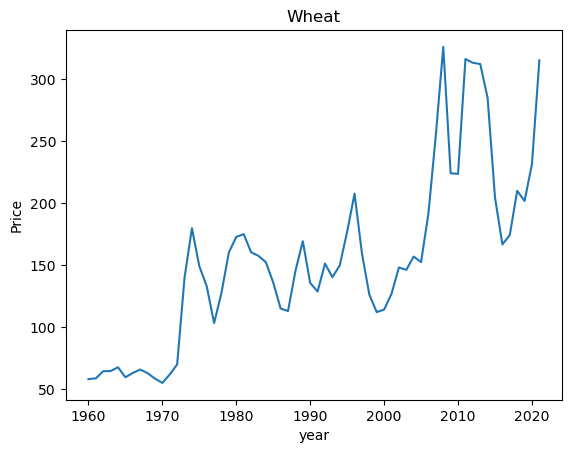

In [ ]:
x=np.array(data[item].tolist()).reshape(-1,1)
y=data.iloc[:,0].tolist()

plt.plot(y,x)
plt.title(item) # 圖的標題
plt.xlabel("year") # x軸的名稱
plt.ylabel("Price") # y軸的名稱
plt.show()


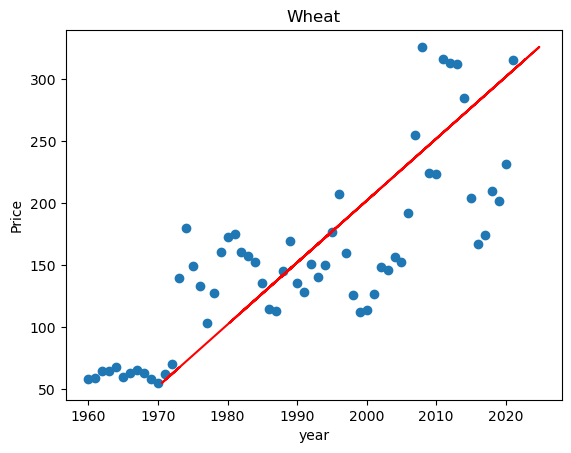

In [ ]:
model = LinearRegression()
model.fit(x,y)
predict = model.predict(x)

plt.title(item) # 圖的標題
plt.xlabel("year") # x軸的名稱
plt.ylabel("Price") # y軸的名稱
plt.plot(predict,x,c="red")
plt.scatter(y,x)
plt.show()
#plt.plot(y,x)
#plt.show()

<AxesSubplot:xlabel='Wheat'>

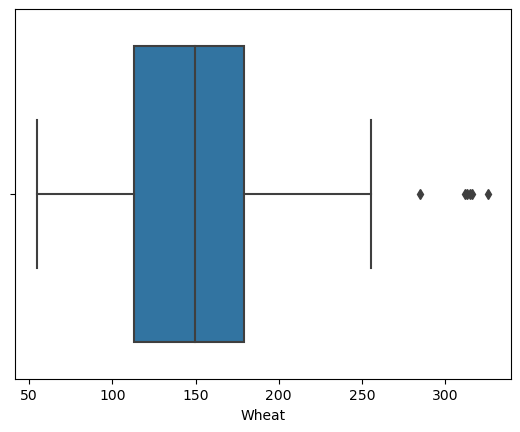

In [ ]:
import seaborn as sns

#列出資訊
#data[item].describe() 
#有離群值的箱型圖
sns.boxplot(x=data[item])

In [ ]:
IQR = data[item].quantile(0.75) - data[item].quantile(0.25)

Lower_quantile = data[item].quantile(0.25) - (IQR * 1.5)
Upper_quantile = data[item].quantile(0.75) + (IQR * 1.5)
#print(Upper_quantile)
data_no_outlier=[]
year_no_outlier=[]
for i in range(0,len(data[item])):
    if(data[item][i]>Lower_quantile)&(data[item][i]<Upper_quantile):
        data_no_outlier.append(data[item][i])
        year_no_outlier.append(data["Year"][i])
newx=np.array(data_no_outlier).reshape(-1,1)
newy=np.array(year_no_outlier).reshape(-1,1)
#newx
#newy

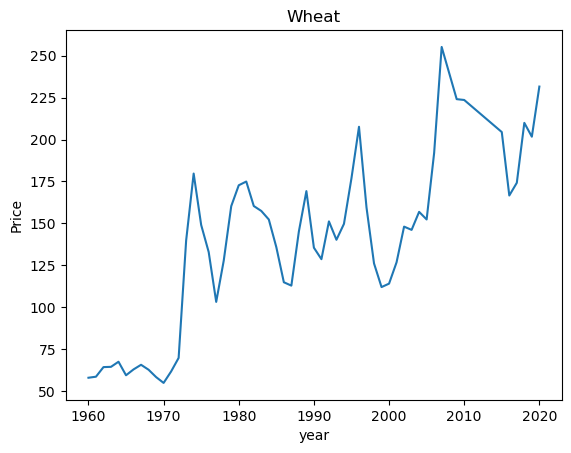

In [ ]:
plt.title(item) # 圖的標題
plt.xlabel("year") # x軸的名稱
plt.ylabel("Price") # y軸的名稱
plt.plot(newy,newx)
plt.show()



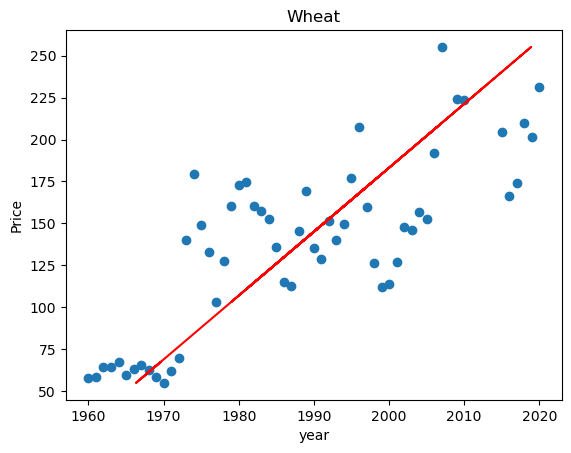

In [ ]:
model2 = LinearRegression()
model2.fit(newx,newy)
predict = model2.predict(newx)
plt.title(item) # 圖的標題
plt.xlabel("year") # x軸的名稱
plt.ylabel("Price") # y軸的名稱
plt.plot(predict,newx,c="red")
plt.scatter(newy,newx)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
size=0.5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = size, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
score1 = regressor.score(x_test, y_test)
print("data_with_outlier:",score1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(newx, newy, test_size = size, random_state = 0)
regressor2 = LinearRegression()
regressor2.fit(x_train2, y_train2)
score2 = regressor2.score(x_test2, y_test2)
print("data_without_outlier:",score2)

data_with_outlier: 0.4995031618786253
data_without_outlier: 0.6114492775132305


In [ ]:
#future=np.array([2022,2023]).reshape(-1.1)
a1=model.intercept_
b1=model.coef_
answer=((2022-a1)/b1)
print(answer)
print('a1', a1)
print('b1', b1)

[311.91335905]
a1 1959.5731420004702
b1 [0.20014166]


In [ ]:
#截距
a2=model2.intercept_
#迴歸係數
b2=model2.coef_
answer2=((2022-a2)/b2)
print(answer2)


[[266.96187585]]


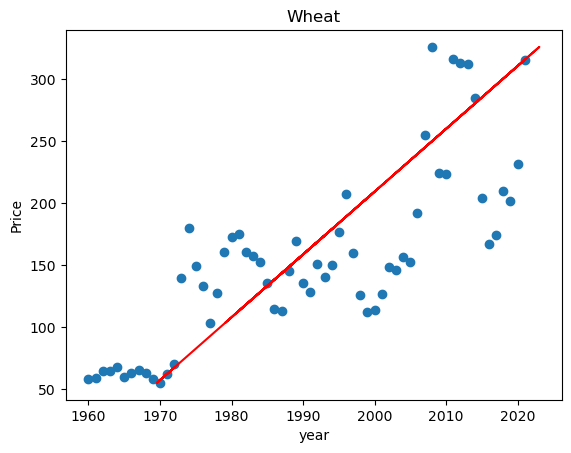

score: 0.6323646642703028
2022: [[320.78112334]]


In [ ]:
data = pd.read_csv("commodity_prices.csv")
item="Wheat"

x=np.array(data[item].tolist()).reshape(-1,1)
y=data.iloc[:,0].tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 建立 kernel='linear' 模型
linearModel=svm.SVR(C=1, kernel='linear')
# 使用訓練資料訓練模型
linearModel.fit(x_train,y_train)
# 使用訓練資料預測分類
predict=linearModel.predict(x)


score = linearModel.score(x_test,y_test)
print("score:", score)

a1=linearModel.intercept_
b1=linearModel.coef_
answer=((2022-a1)/b1)
print('2022:',answer)


plt.title(item) # 圖的標題
plt.xlabel("year") # x軸的名稱
plt.ylabel("Price") # y軸的名稱
plt.plot(predict,x,c="red")
plt.scatter(y,x)
plt.show()
#plt.plot(y,x)
#plt.show()
# score = regressor2.score(x_test2, y_test2)

